In [ ]:
import sys
!{sys.executable} -m pip install mycolorpy

In [1]:
from models import Entity, Environment
from vizuals import plot_env_history

import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

from random import uniform

TRAIN_SIZE = 200
LIMS = (-1, 1)
VAL_LIMS = (-1.5, 1.5)

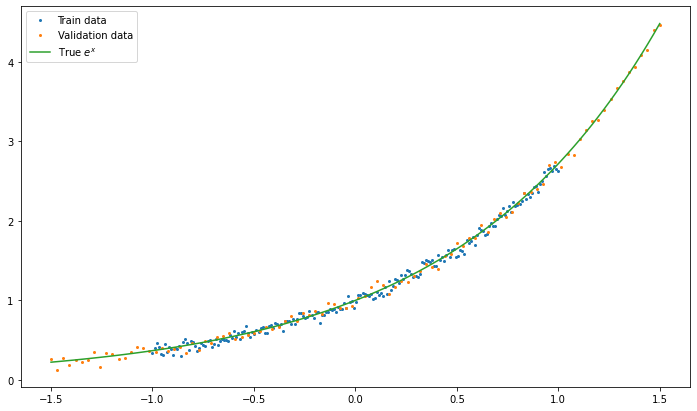

In [2]:
x_arr = torch.linspace(*LIMS, TRAIN_SIZE)
y_arr = torch.exp(x_arr) + torch.normal(0, 0.05, size=(TRAIN_SIZE,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1), y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

x_val = torch.linspace(*VAL_LIMS, 100)
y_val = torch.exp(x_val) + torch.normal(0, 0.05, size=(100,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

true_y = torch.exp(x_val)
dataset = Data.TensorDataset(x_val.unsqueeze(1), true_y.unsqueeze(1))
test_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=1, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

plt.rcParams["figure.figsize"] = (12,7)
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2, label="Validation data")
plt.plot(x_val, true_y, label=f"True $e^x$")
plt.legend()
plt.savefig("exp.png")
plt.show()

In [3]:
env = Environment(15, train_loader, train_epochs=25, validation_loader=val_loader)
start_time = time.time()
env.train_epoch()
print(f"Train ended in {int(time.time() - start_time)} s")
env.validate_entities(val_loader, True)

test_history = []
test_history.append(env.validate_entities(test_loader, False))

cpu
Train ended in 13 s


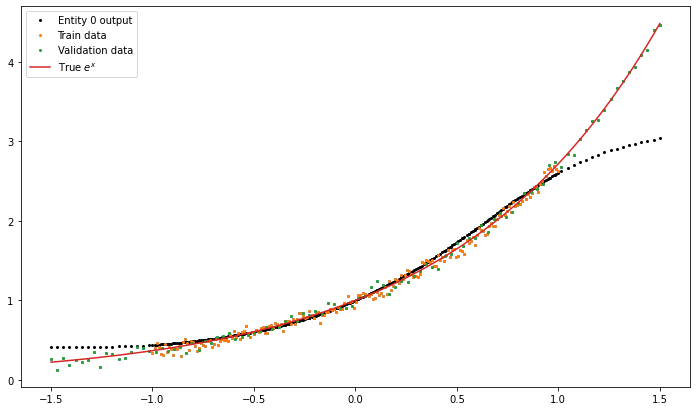

In [15]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[2].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Entity 0 output", marker="o", lw=0, markersize=2, color="black")
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2, label="Validation data")
plt.plot(x_val, true_y, label=f"True $e^x$")
plt.legend()
plt.savefig("Entity_0_output.png", dpi=600)
plt.show()

In [16]:
for i in range(10):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities(val_loader, True)
    test_history.append(env.validate_entities(test_loader, False))
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.023204584359191358 2
0.037192570114857514 1
0.04410691987490282 7
0.049054575855843725 12
0.05137543939054012 10
0.1139740584231913 14
0.1393915342912078 9
0.18235390543937685 11
0.18425568781793117 6
0.2544301605969667 3
0.274432805031538 13
0.27571951150894164 5
Evo epoch 1 ended in 13 s
0.027449974537303207 2
0.033195874961093066 2
0.03396387508604676 1
0.041445430400199254 7
0.04817208267748356 1
0.049850353654474024 10
0.05122424904257059 12
0.051748086910229175 7
0.0623825627937913 11
0.0884176182281226 5
0.11345044611953199 14
0.24077402599155903 3
Evo epoch 2 ended in 13 s
0.02201982313883491 2
0.031115517343860123 2
0.04031717897509225 7
0.044266007873229686 7
0.04524058250011877 1
0.046213201784994454 1
0.0485965681867674 1
0.05151079066097737 10
0.053928693858906626 2
0.05405388312414289 12
0.06431243795901537 2
0.06671699073165656 11
Evo epoch 3 ended in 14 s
0.019202433768659828 2
0.01958618669072166 2
0.02253373511368409 2
0.027873712372966108 2
0.03952657213667408 1
0.

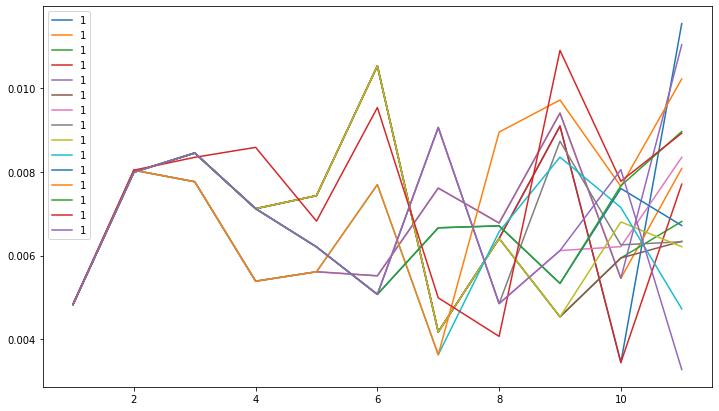

In [7]:
plot_env_history(env)

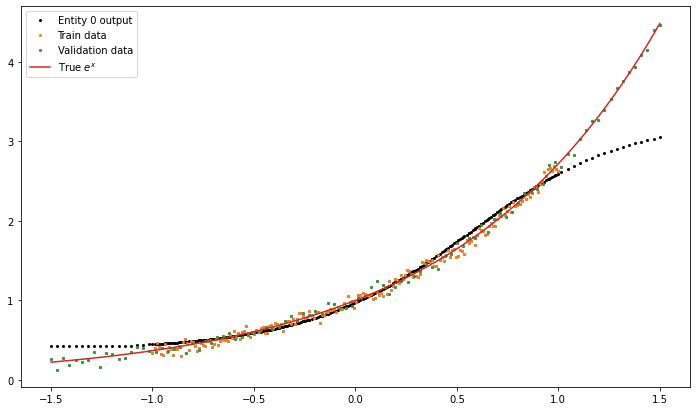

In [18]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[0].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Entity 0 output", marker="o", lw=0, markersize=2, color="black")
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2, label="Validation data")
plt.plot(x_val, true_y, label=f"True $e^x$")
plt.legend()
plt.savefig("Entity_0_trained_output.png", dpi=600)
plt.show()

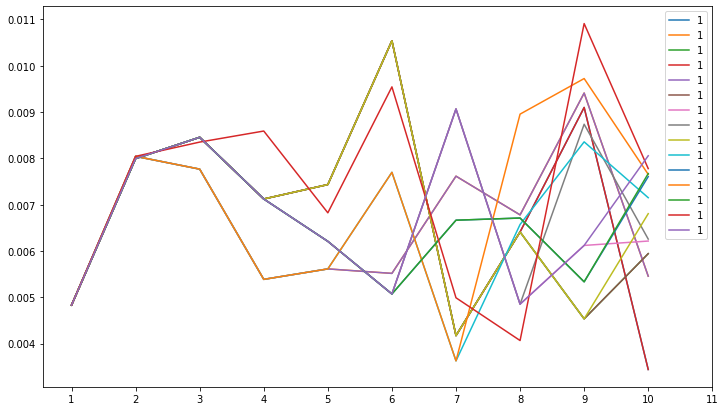

In [13]:
x = list(range(1, env.evo_epochs+1))
for entity in env.entities:
    plt.plot(x[:-1], entity.entity_history[:-1], label=entity.color+1)
plt.legend()
plt.xticks(x, x)
plt.show()

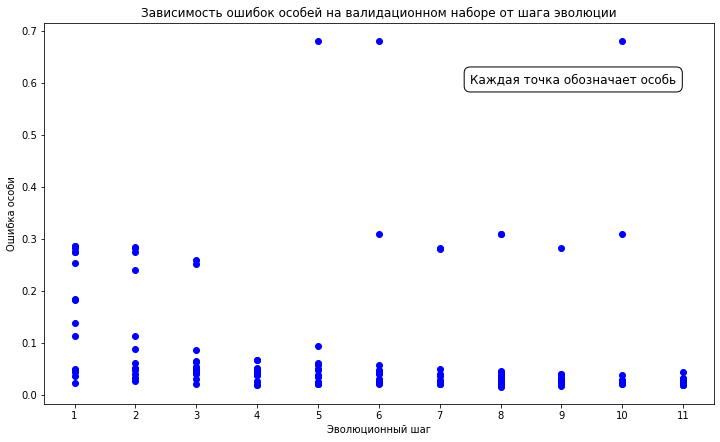

In [19]:
for i, arr in enumerate(env.history):
    for loss in arr:
        plt.scatter(i+1, loss, color="blue")
plt.xlabel("Эволюционный шаг")
plt.ylabel("Ошибка особи")
plt.title("Зависимость ошибок особей на валидационном наборе от шага эволюции")
plt.rcParams["figure.figsize"] = (12,7)
plt.text(7.5, 0.6, 'Каждая точка обозначает особь', color='black', size=12,
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
plt.rcParams['figure.dpi'] = 300
plt.xticks(list(range(1, len(env.history)+1)))
plt.savefig("val_loss(evo_epoch).png")
plt.show()

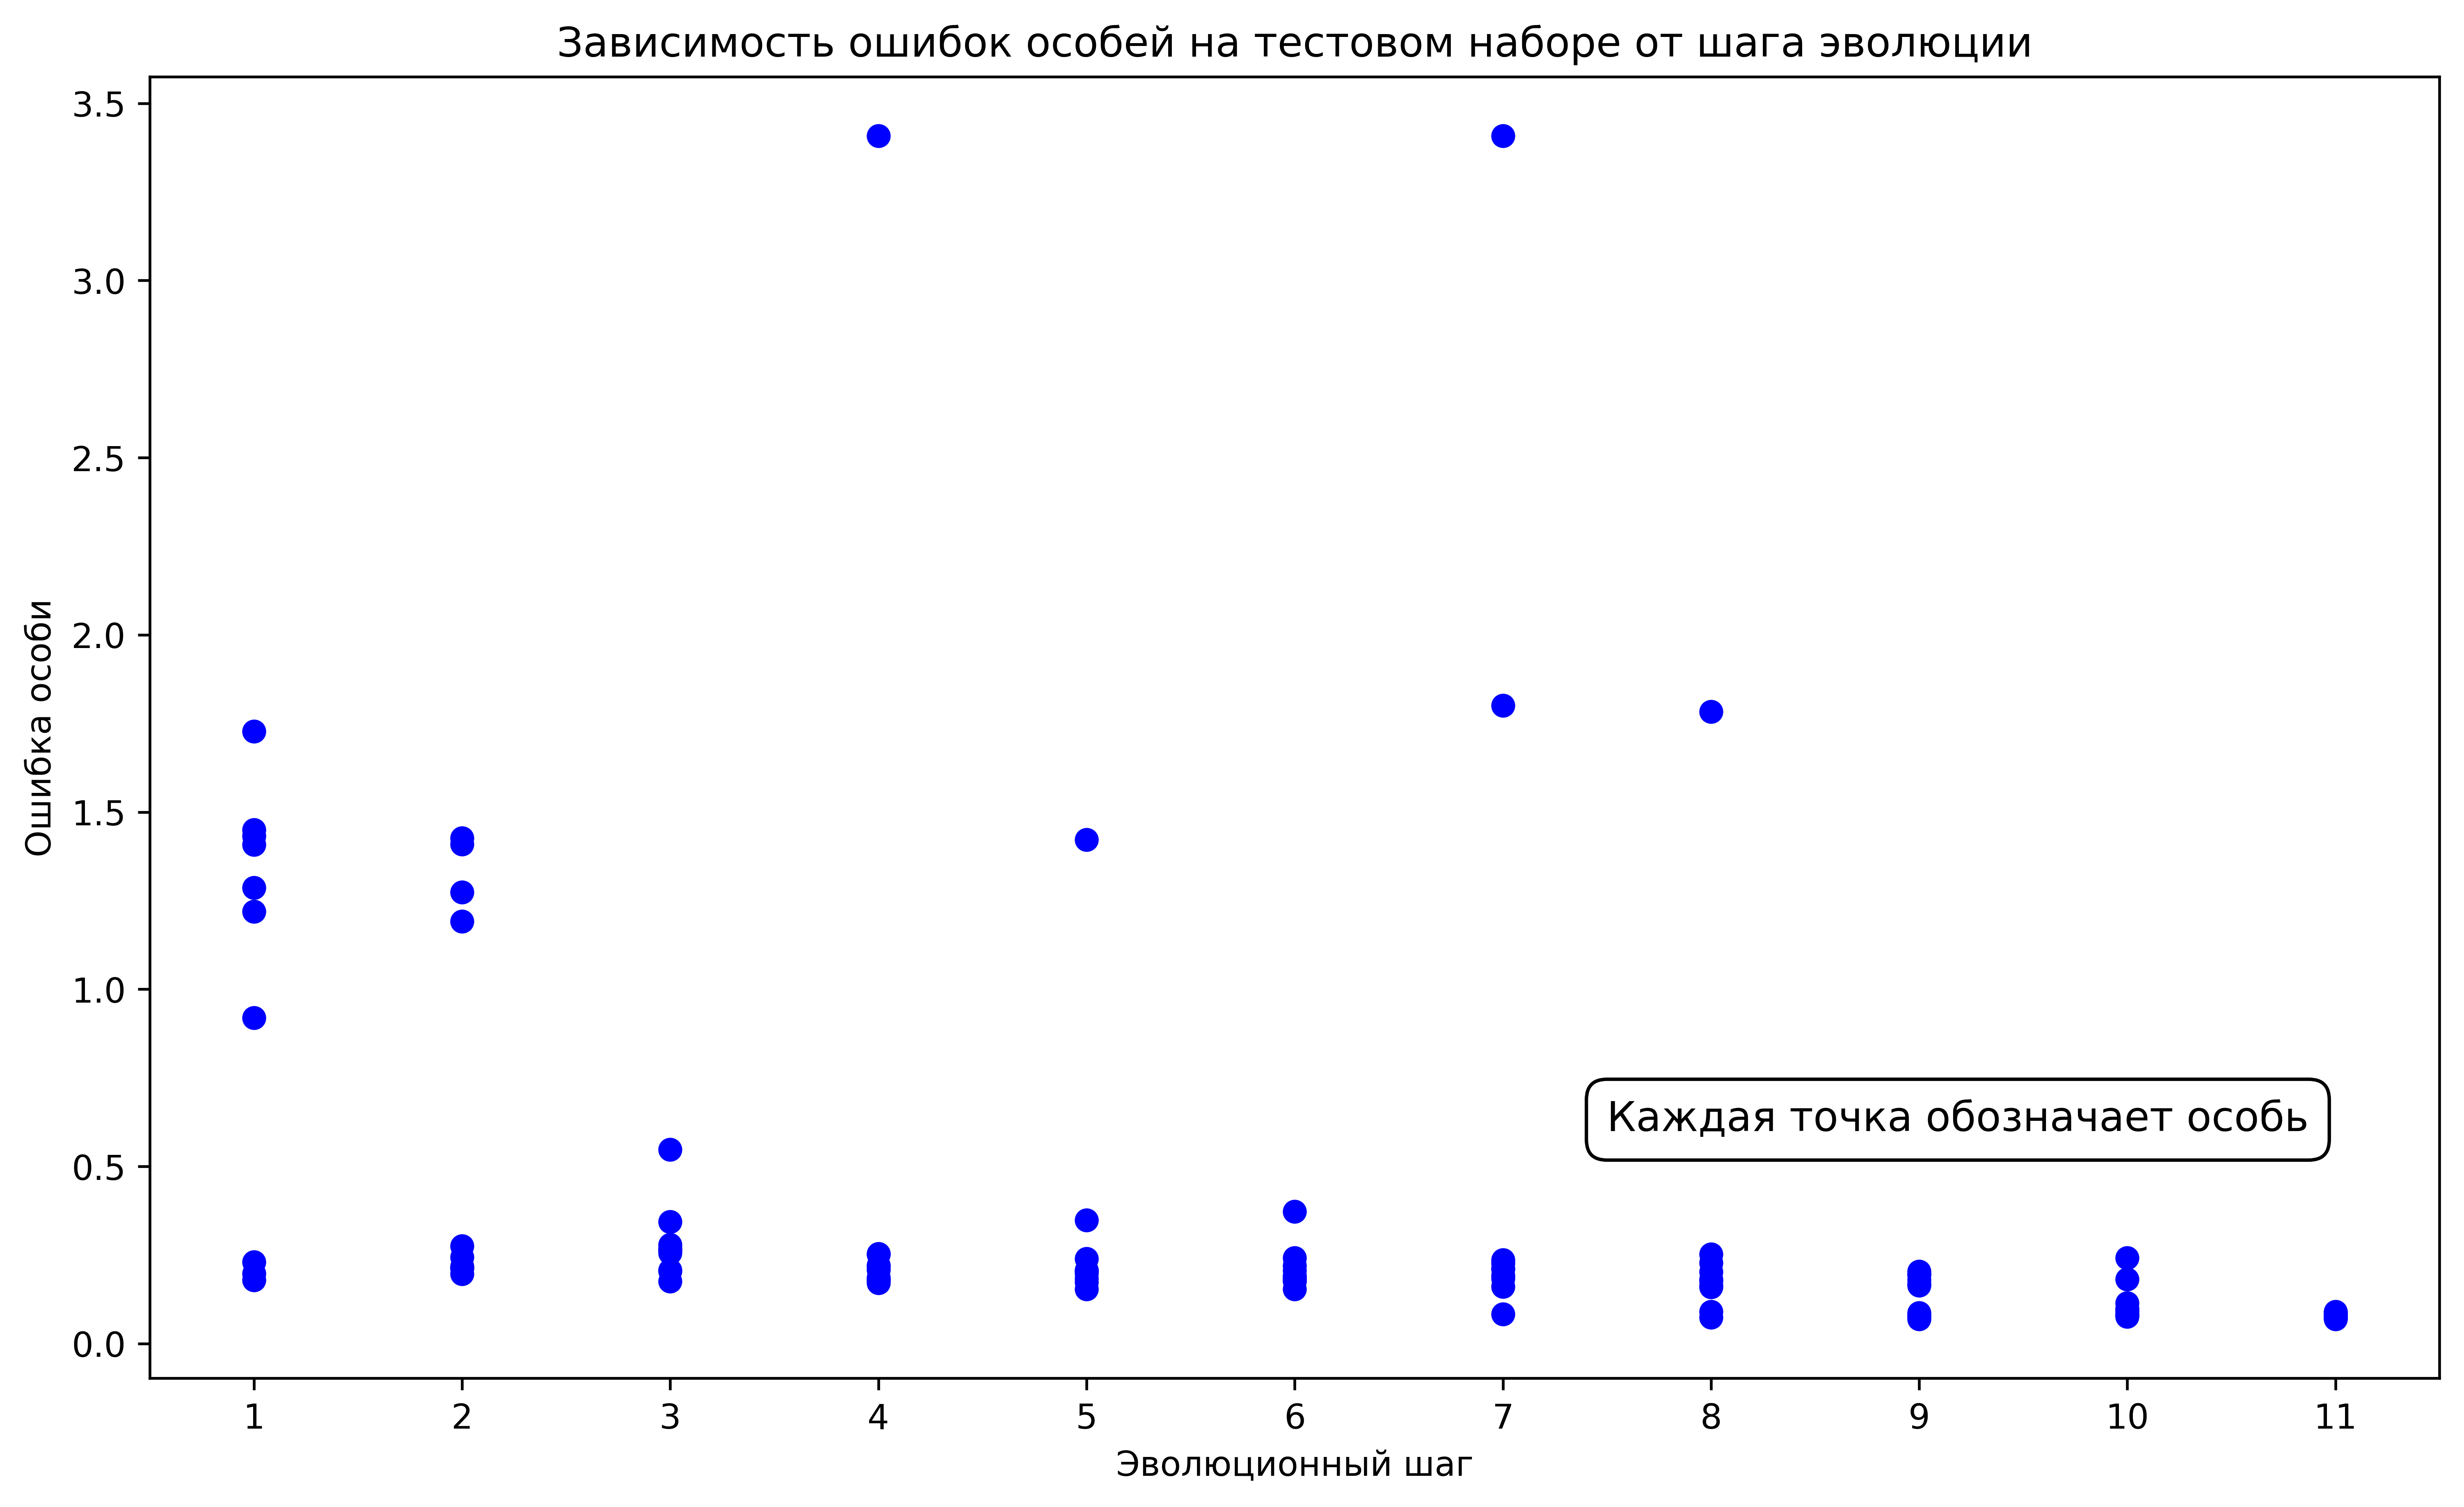

In [59]:
for i, arr in enumerate(test_history):
    for loss in arr:
        plt.scatter(i+1, loss, color="blue")
plt.xlabel("Эволюционный шаг")
plt.ylabel("Ошибка особи")
plt.title("Зависимость ошибок особей на тестовом наборе от шага эволюции")
plt.rcParams["figure.figsize"] = (12,7)
plt.text(7.5, 0.6, 'Каждая точка обозначает особь', color='black', size=12,
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
plt.rcParams['figure.dpi'] = 300
plt.xticks(list(range(1, len(env.history)+1)))
plt.savefig("val_loss(evo_epoch).png")
plt.show()

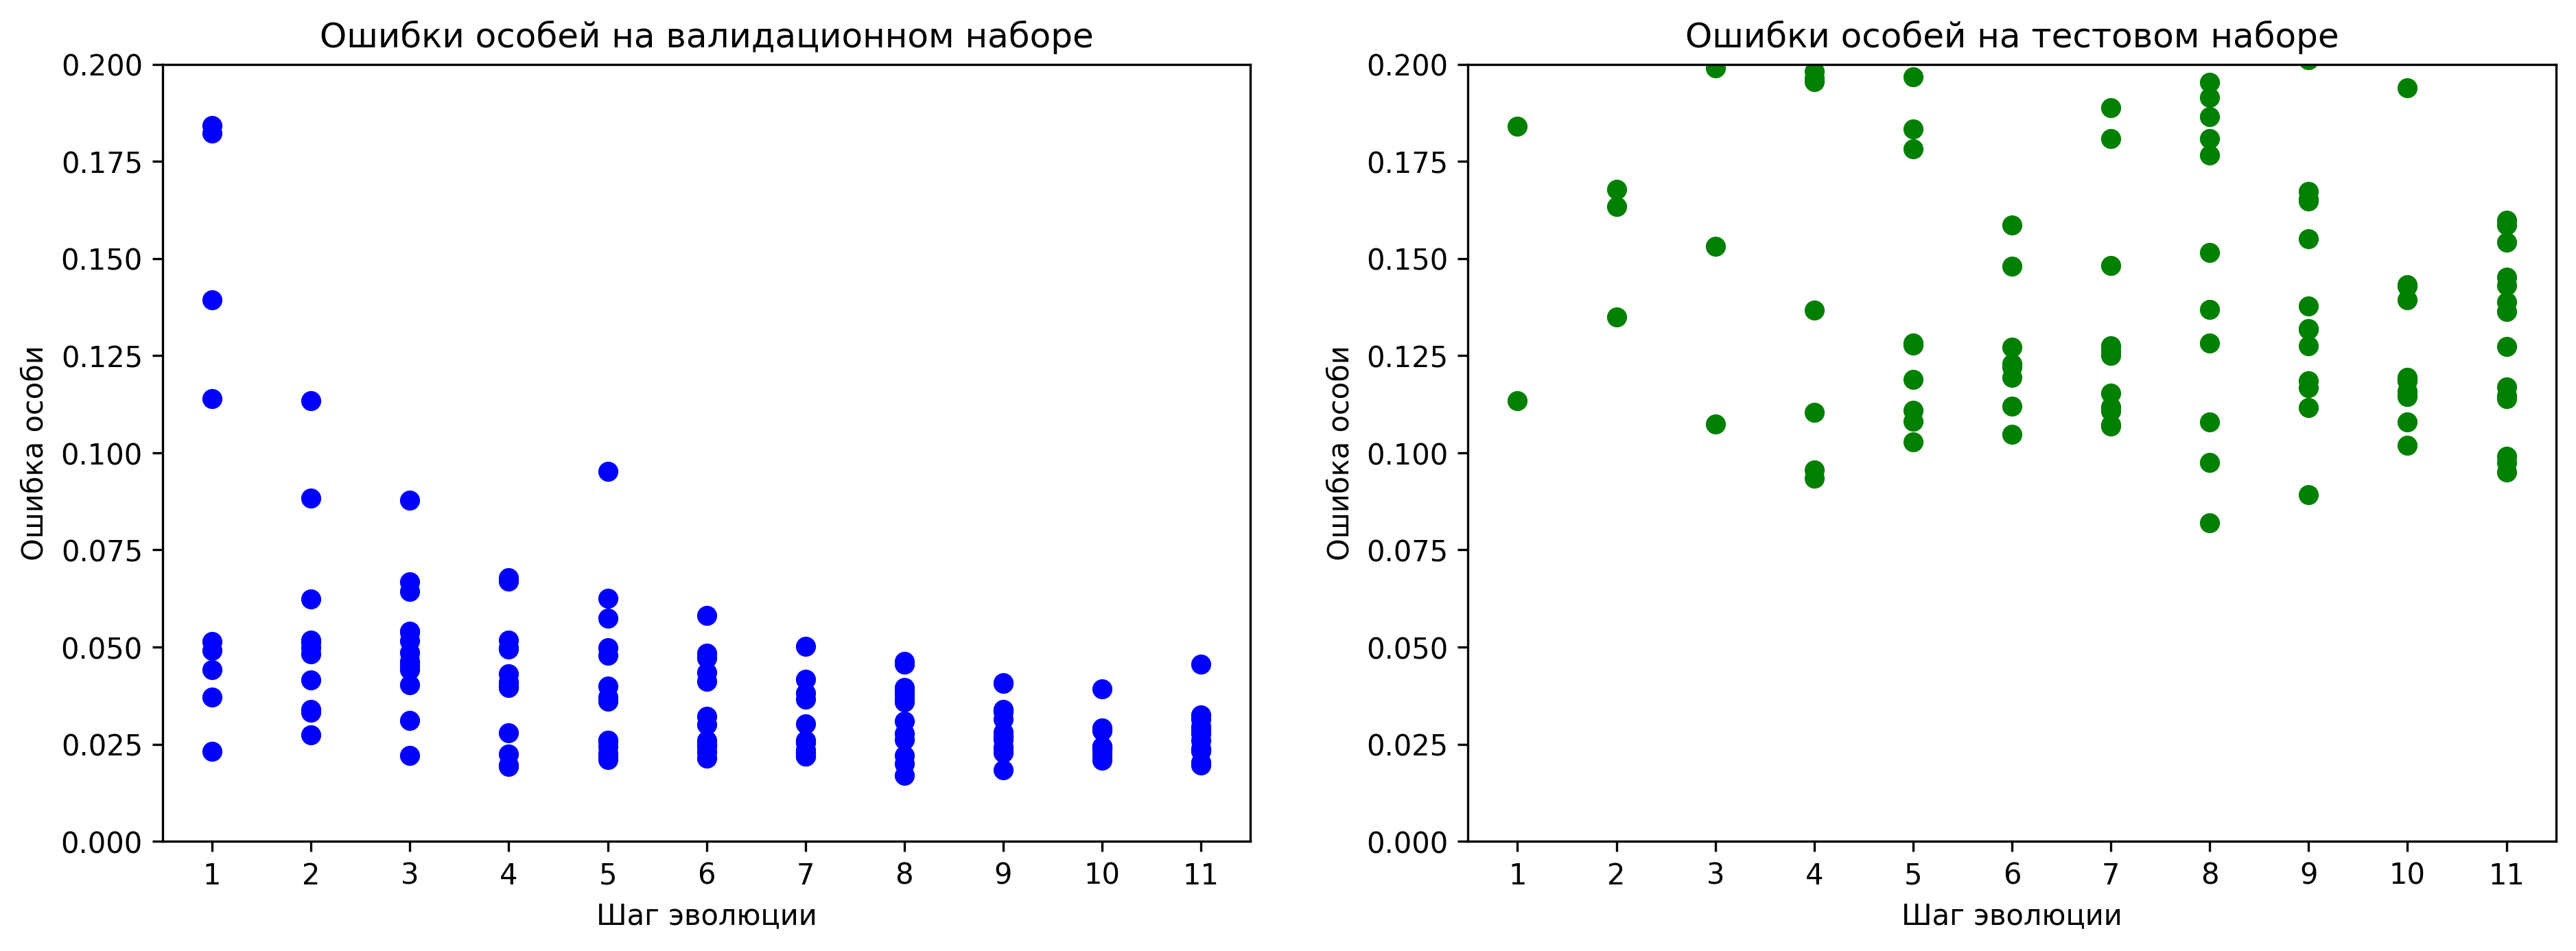

In [20]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

ax1, ax2 = axes

ax1.set_title("Ошибки особей на валидационном наборе")
ax1.set_xlabel("Шаг эволюции")
ax1.set_ylabel("Ошибка особи")
ax1.set_ylim((0, 0.2))
for i, arr in enumerate(env.history):
    for loss in arr:
        ax1.scatter(i+1, loss, color="blue")
ax1.set_xticks(list(range(1, len(env.history)+1)))

ax2.set_title("Ошибки особей на тестовом наборе")
ax2.set_xlabel("Шаг эволюции")
ax2.set_ylabel("Ошибка особи")
ax2.set_ylim((0, 0.2))
for i, arr in enumerate(test_history):
    for loss in arr:
        ax2.scatter(i+1, loss, color="green")
ax2.set_xticks(list(range(1, len(env.history)+1)))
plt.savefig("loss(evo_epoch).png", edgecolor='black', dpi=600, facecolor='white')
plt.show()

In [21]:
for i in range(10):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities(val_loader, True)
    test_history.append(env.validate_entities(test_loader, False))
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.0195791682228446 2
0.020002515554660934 2
0.020350722710136323 2
0.023330431922804564 2
0.02342387788929045 2
0.023941655475646258 2
0.025960151248145845 2
0.027814165269955993 2
0.02829179328866303 2
0.029106201382819562 2
0.02956018694676459 2
0.03142324340064079 2
Evo epoch 1 ended in 16 s
0.017574225608259438 2
0.019336302353767678 2
0.019565672191092745 2
0.020774952574865894 2
0.021654059926222543 2
0.023763036264572292 2
0.026197226135991514 2
0.026452075853012503 2
0.029062653235159813 2
0.03035000045201741 2
0.032107371229212735 2
0.03396334201097488 2
Evo epoch 2 ended in 17 s
0.016114924603607507 2
0.016454586291220038 2
0.016616745503270067 2
0.01813342297798954 2
0.01825805227737874 2
0.019396521518938243 2
0.019934804570511916 2
0.02056321517564356 2
0.021286764511605723 2
0.02273711924441159 2
0.0229678990773391 2
0.030961172450333835 2
Evo epoch 3 ended in 17 s
0.011937260548584164 2
0.015333512399811297 2
0.01579028706997633 2
0.0170821576169692 2
0.01924463445786387

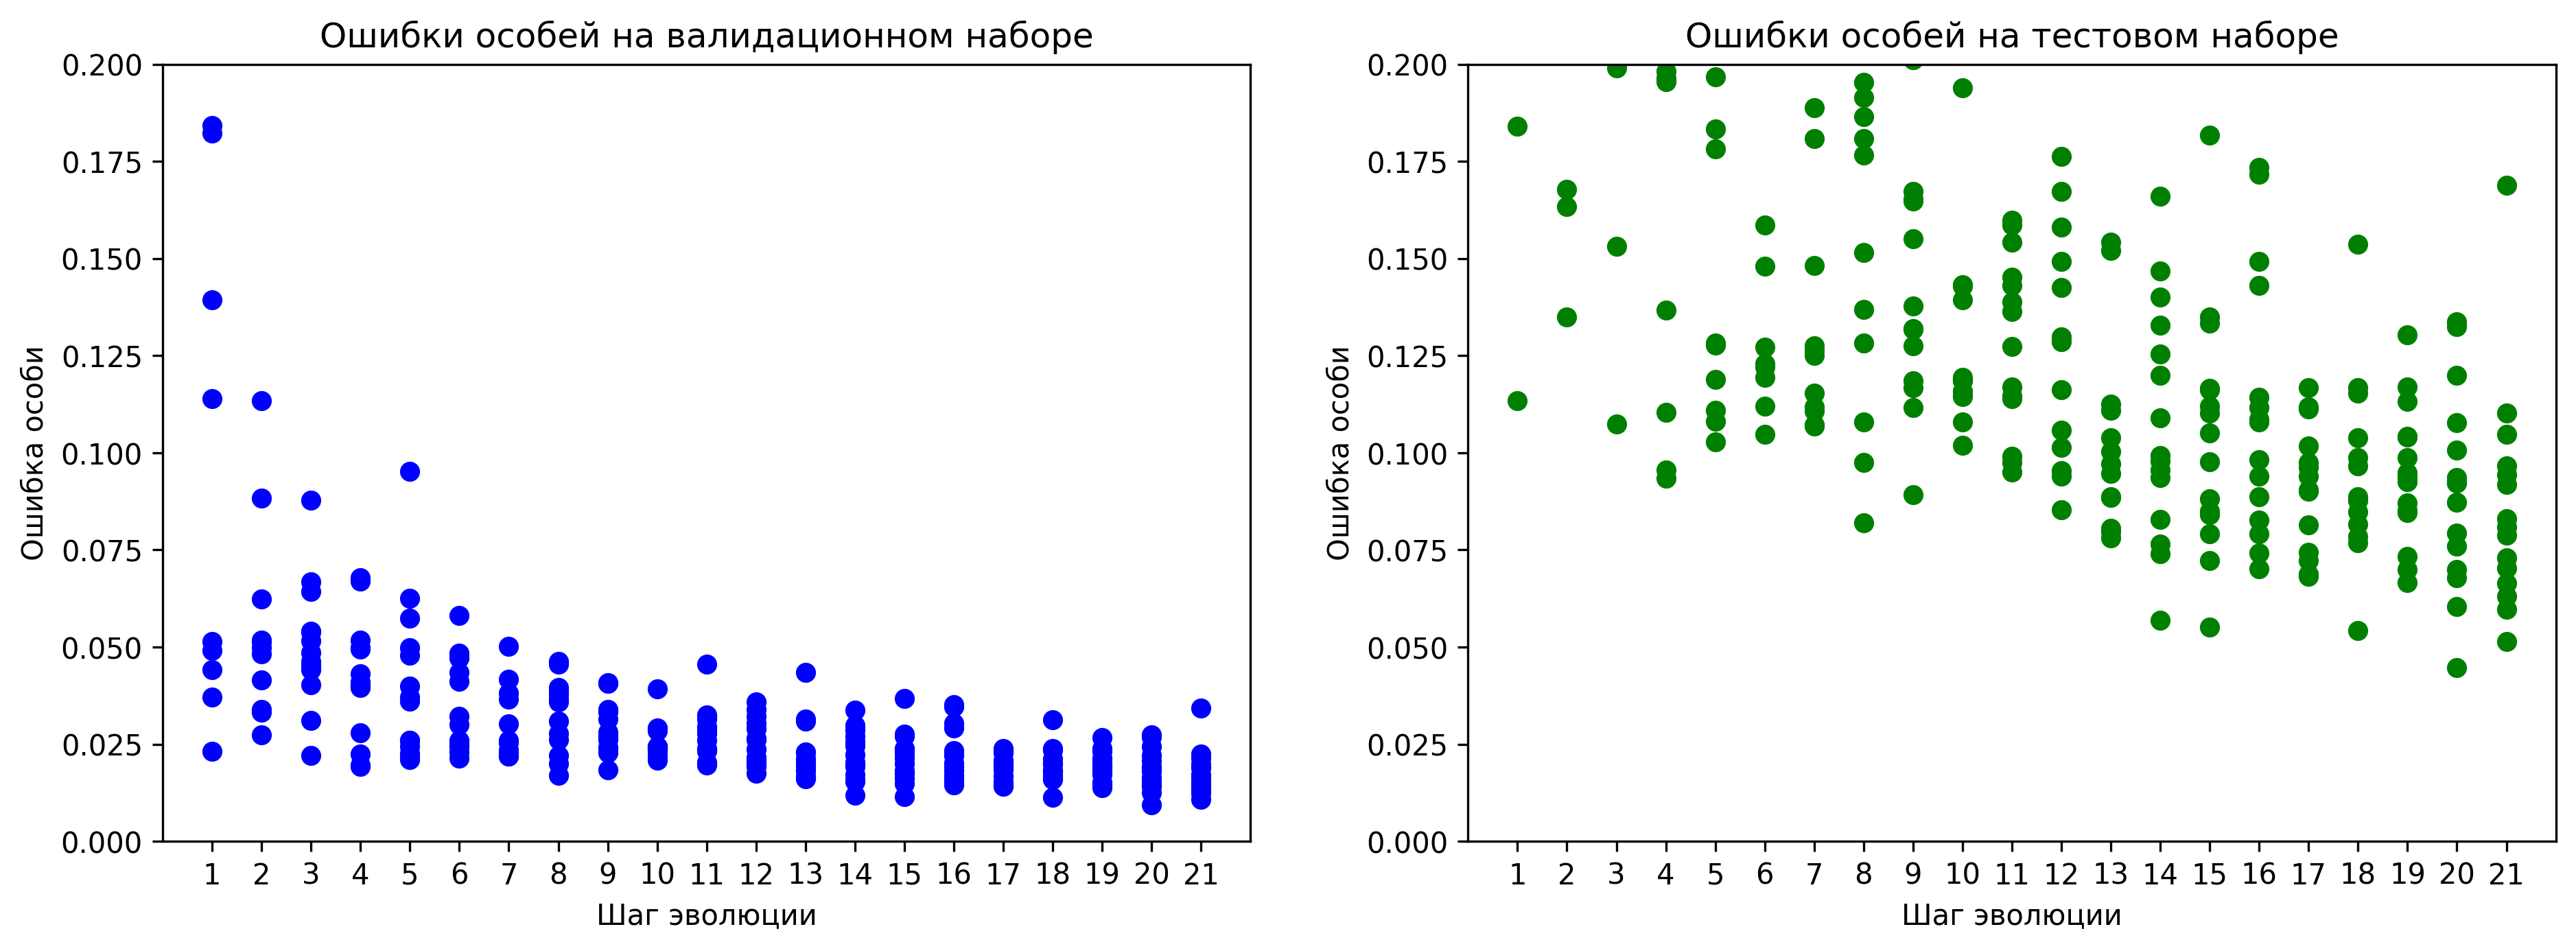

In [23]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

ax1, ax2 = axes

ax1.set_title("Ошибки особей на валидационном наборе")
ax1.set_xlabel("Шаг эволюции")
ax1.set_ylabel("Ошибка особи")
ax1.set_ylim((0, 0.2))
for i, arr in enumerate(env.history):
    for loss in arr:
        ax1.scatter(i+1, loss, color="blue")
ax1.set_xticks(list(range(1, len(env.history)+1)))

ax2.set_title("Ошибки особей на тестовом наборе")
ax2.set_xlabel("Шаг эволюции")
ax2.set_ylabel("Ошибка особи")
ax2.set_ylim((0, 0.2))
for i, arr in enumerate(test_history):
    for loss in arr:
        ax2.scatter(i+1, loss, color="green")
ax2.set_xticks(list(range(1, len(env.history)+1)))
plt.savefig("loss(evo_epoch)_20.png", edgecolor='black', dpi=600, facecolor='white')
plt.show()

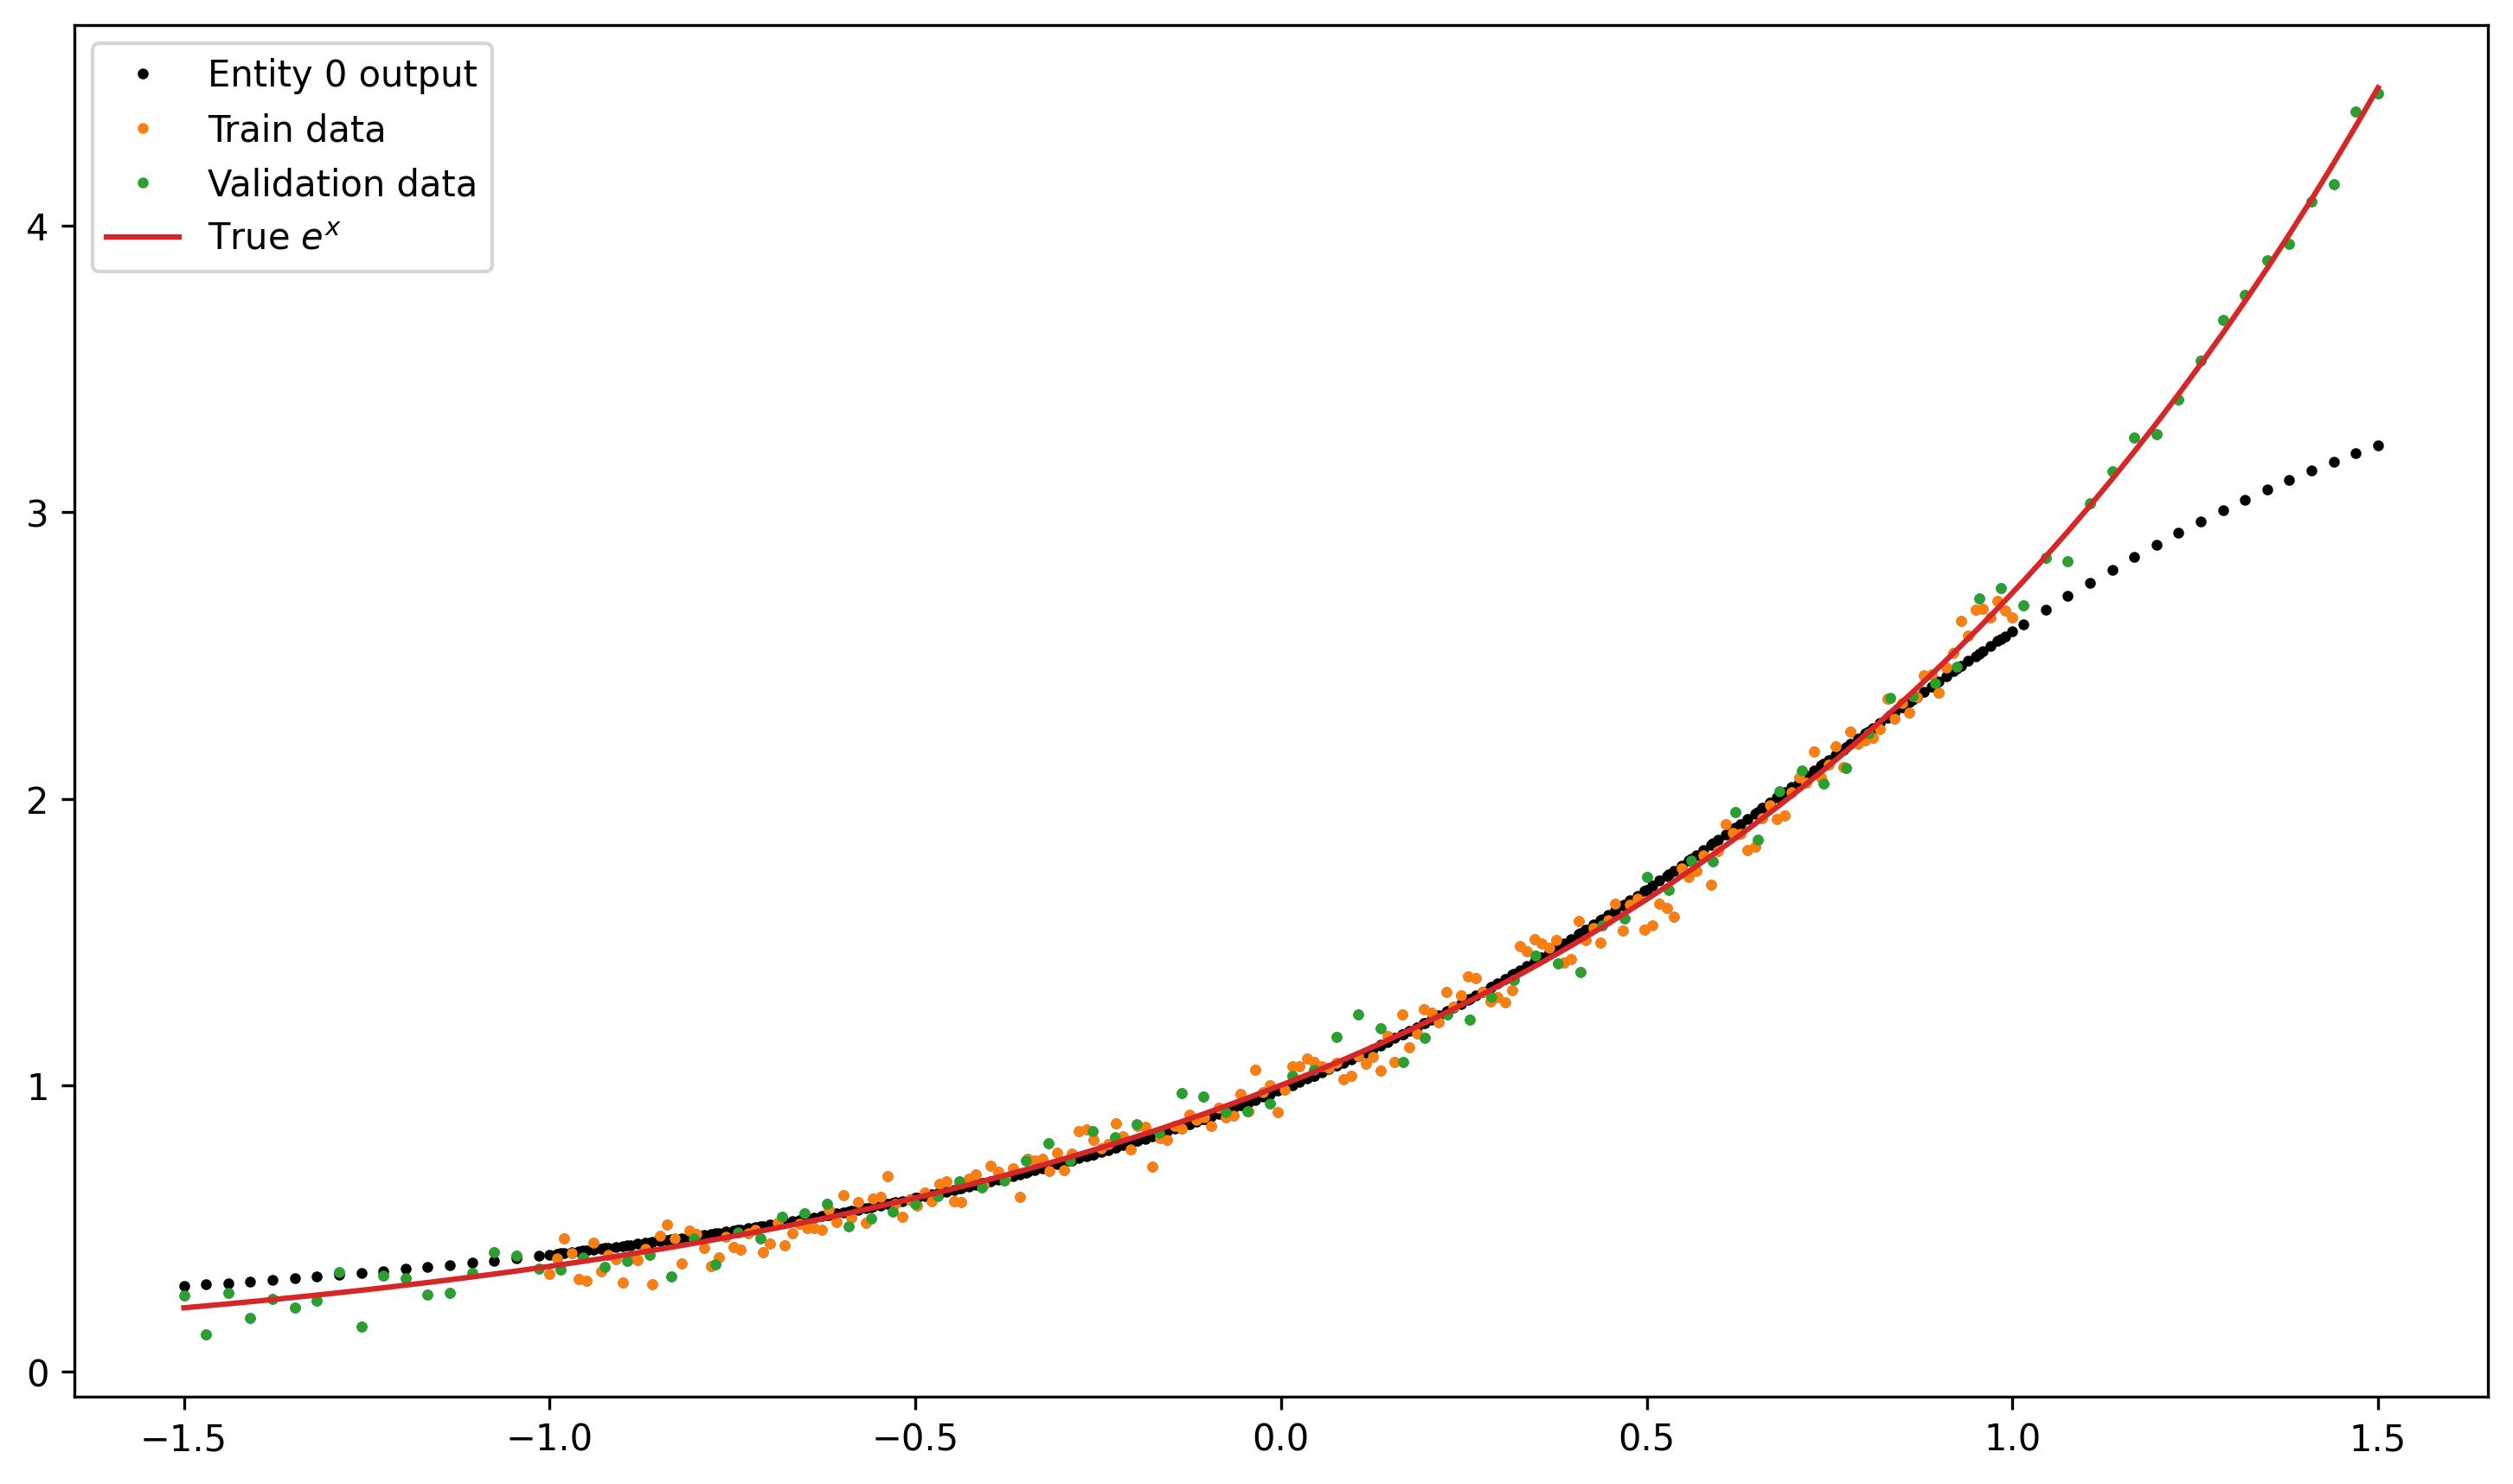

In [28]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[4].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Entity 0 output", marker="o", lw=0, markersize=2, color="black")
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2, label="Validation data")
plt.plot(x_val, true_y, label=f"True $e^x$")
plt.savefig("Entity_0_trained_20_output.png", dpi=600)
plt.legend()
plt.show()

In [29]:
for i in range(10):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities(val_loader, True)
    test_history.append(env.validate_entities(test_loader, False))
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.01075454787351191 2
0.012453929311595857 2
0.013135686102323236 2
0.013791921988595277 2
0.01454804012319073 2
0.015096129688899965 2
0.016214964569662697 2
0.01670089382561855 2
0.0170791519805789 2
0.018851558058522642 2
0.019363945112563667 2
0.019826732589281165 2
Evo epoch 1 ended in 17 s
0.011099100119899959 2
0.011726998324738816 2
0.012861039717681705 2
0.013990010308334605 2
0.014492870006943121 2
0.015585428150370718 2
0.015820389171130954 2
0.01596500086947344 2
0.0164444543258287 2
0.01705233575310558 2
0.01746774439001456 2
0.020582765322178603 2
Evo epoch 2 ended in 17 s
0.01131433294620365 2
0.011361244638683274 2
0.012058473164215685 2
0.012425277889124117 2
0.013439145439770072 2
0.013506485333200544 2
0.013742309472872877 2
0.01406588904792443 2
0.014308707583695651 2
0.014314624893013389 2
0.014654644082766028 2
0.01584359487053007 2


C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\init.py:403: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Evo epoch 3 ended in 16 s
0.008543169388431124 2
0.011154678310267627 2
0.011448554096277803 2
0.011501221042126416 2
0.011592853721231222 2
0.012003750693402253 2
0.012375424932688475 2
0.012520195946563034 2
0.013879533591680229 2
0.014258906038012355 2
0.01492107143159956 2
0.018469526616390793 2
Evo epoch 4 ended in 18 s
0.012089734990149736 2
0.012356472337269223 2
0.01281319706933573 2
0.012873697305331005 2
0.012944605959346517 2
0.013037175126373767 2
0.013715713705169035 2
0.014651176703628152 2
0.014766197020653635 2
0.015298308067722246 2
0.016121371454792095 2
0.01655420304276049 2
Evo epoch 5 ended in 17 s
0.007156930081546306 2
0.009105060484725983 2
0.010684141601668671 2
0.010892450239043682 2
0.011095234677195549 2
0.011307509699836373 2
0.012357727466151118 2
0.01274531248083804 2
0.013509362488985061 2
0.014500799630768595 2
0.01455976048251614 2
0.016999425460817293 2
Evo epoch 6 ended in 17 s
0.007644946775399149 2
0.009096969574457034 2
0.010344977667555214 2
0.01

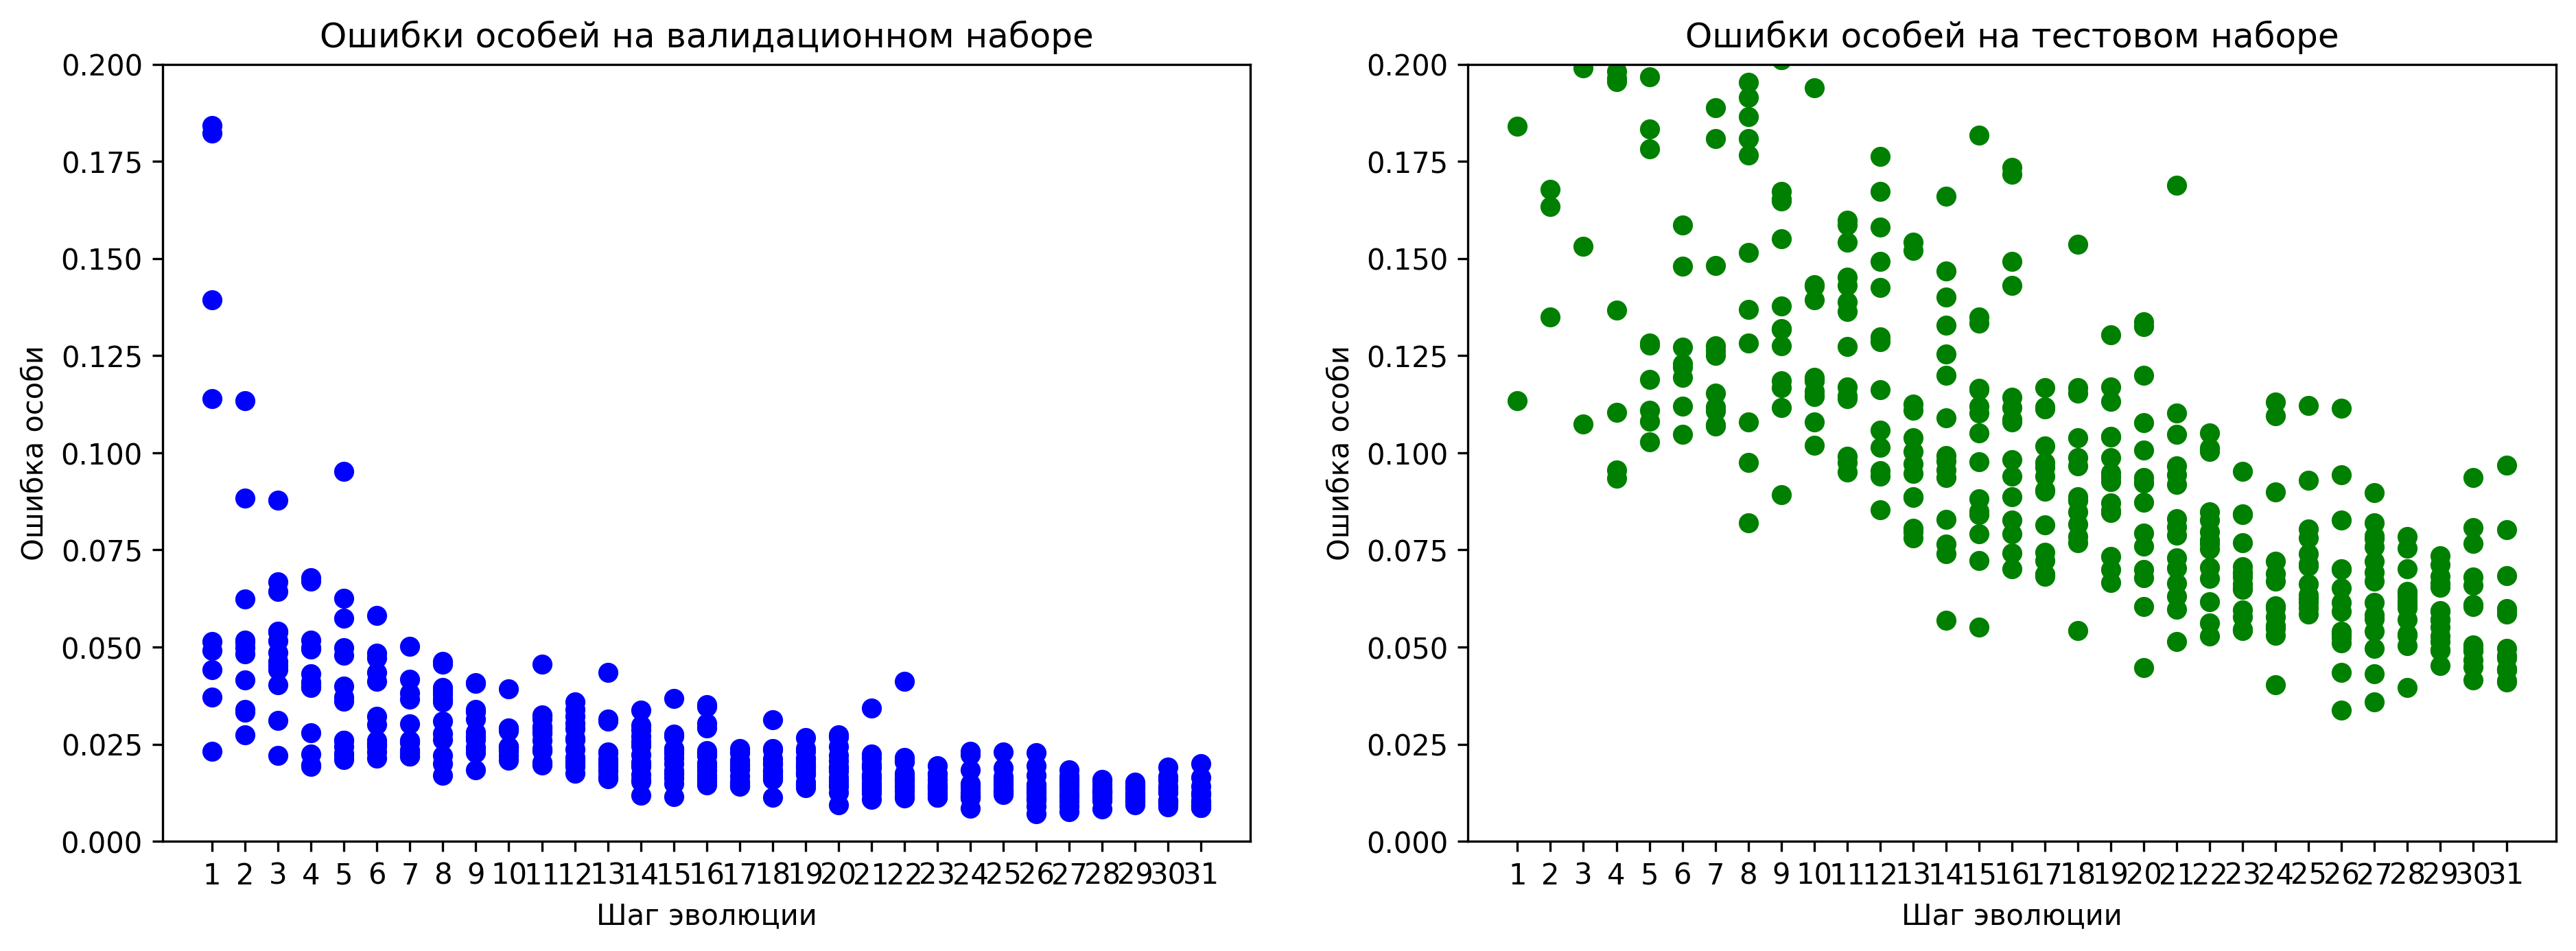

In [32]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

ax1, ax2 = axes

ax1.set_title("Ошибки особей на валидационном наборе")
ax1.set_xlabel("Шаг эволюции")
ax1.set_ylabel("Ошибка особи")
ax1.set_ylim((0, 0.2))
for i, arr in enumerate(env.history):
    for loss in arr:
        ax1.scatter(i+1, loss, color="blue")
ax1.set_xticks(list(range(1, len(env.history)+1)))

ax2.set_title("Ошибки особей на тестовом наборе")
ax2.set_xlabel("Шаг эволюции")
ax2.set_ylabel("Ошибка особи")
ax2.set_ylim((0, 0.2))
for i, arr in enumerate(test_history):
    for loss in arr:
        ax2.scatter(i+1, loss, color="green")
ax2.set_xticks(list(range(1, len(env.history)+1)))
plt.savefig("loss(evo_epoch)_30.png", edgecolor='black', dpi=600, facecolor='white')
plt.show()

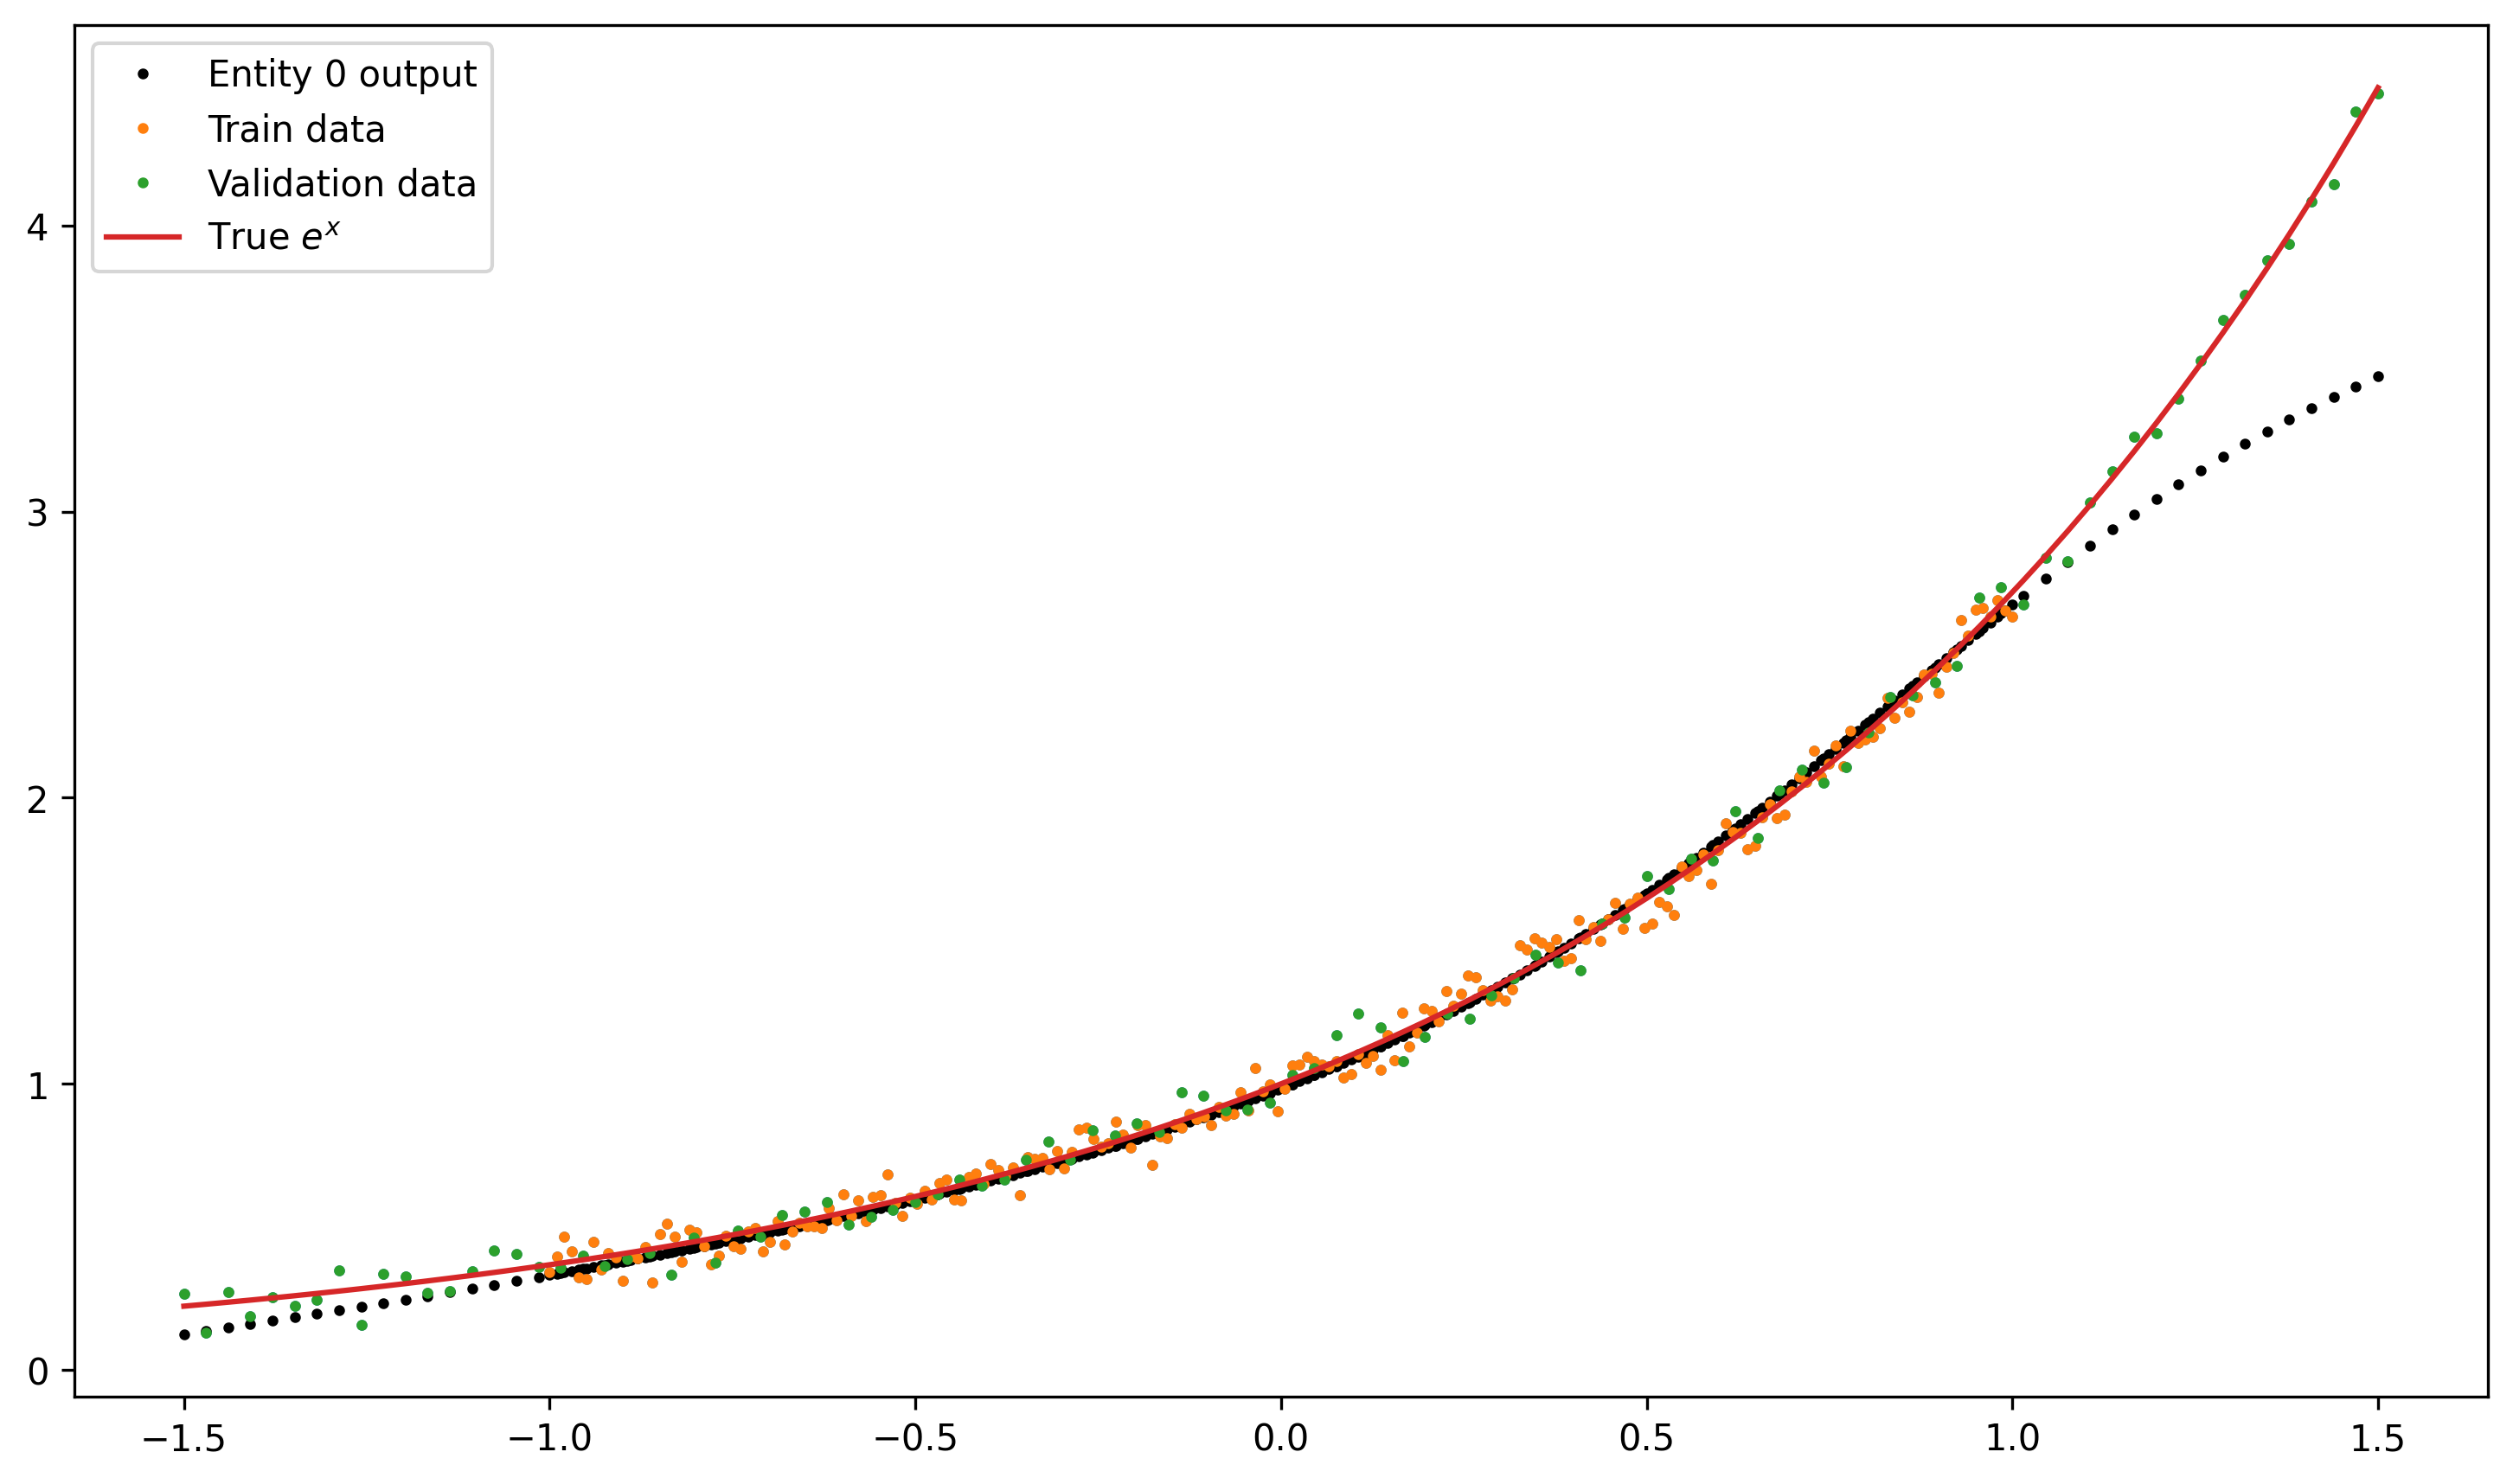

In [33]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[4].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Entity 0 output", marker="o", lw=0, markersize=2, color="black")
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2, label="Validation data")
plt.plot(x_val, true_y, label=f"True $e^x$")
plt.savefig("Entity_0_trained_30_output.png", dpi=600)
plt.legend()
plt.show()